# Image Classification #

## Business Goal ##

We'll be working with Palomar Medical Center, located in Escondido, California. Initially using a deep neural network, then moving onto a Convolutional Neural Network, we build a model that takes patient X-rays and identifies if the patient has Pneumonia or not. Creating a successful model will help the hospital doctors make a quicker diagnosis, and reduce the time spent on consulting X-rays before meeting with patients. 


## Data ##

The data comes from a kaggle dataset of chest X-ray images. There are 5,856 images in total, and the data is split into train, test and validation folders. Each folder is further split into folders that contain Pneumonia and non Pneumonia X-rays.

### Starting the Process ###

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import img_to_array, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from numpy.random import seed
seed(1)
tf.random.set_seed(123) 

In [2]:
#Create our directory paths to our images
train_data_dir = 'data/train'
test_data_dir = 'data/test'
valid_data_dir = 'data/validation'

In [3]:
#Let's plot the number of images in each classification directory

def bar_plot(dir):
  x=len(os.listdir(dir+'/NORMAL'))
  y=len(os.listdir(dir+'/PNEUMONIA'))
  category = ['NORMAL', 'PNEUMONIA']
  count = [x, y]
  plot = plt.bar(category,count) 
  plot[0].set_color('orange')
  plt.title('Number of values for each category')
  plt.show()

Training images:

NORMAL: 1341
PNEUMONIA: 3875
Total Training images: 5216
*************************************************


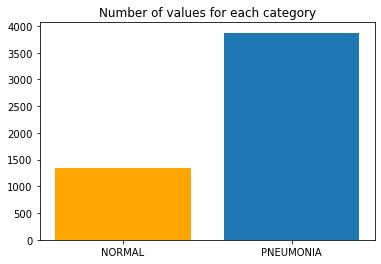

In [4]:
#Number of training images
print('Training images:\n')
print('NORMAL:', len(os.listdir(train_data_dir+'/NORMAL')))
print('PNEUMONIA:', len(os.listdir(train_data_dir+'/PNEUMONIA')))
print('Total Training images:', len(os.listdir(train_data_dir+'/NORMAL')) + len(os.listdir(train_data_dir+'/PNEUMONIA')))
print('*'*49)
bar_plot(train_data_dir)

Test images:

NORMAL: 234
PNEUMONIA: 390
Total Test images: 624
*************************************************


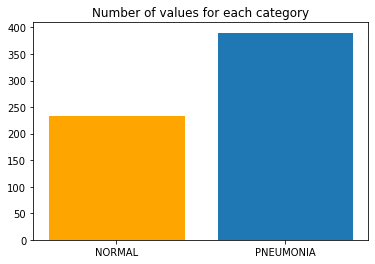

In [5]:
#Number of test images
print('Test images:\n')
print('NORMAL:', len(os.listdir(test_data_dir+'/NORMAL')))
print('PNEUMONIA:', len(os.listdir(test_data_dir+'/PNEUMONIA')))
print('Total Test images:', len(os.listdir(test_data_dir+'/NORMAL')) + len(os.listdir(test_data_dir+'/PNEUMONIA')))
print('*'*49)
bar_plot(test_data_dir)

Validation images:

NORMAL: 8
PNEUMONIA: 8
Total Validation images: 16
***********************************************


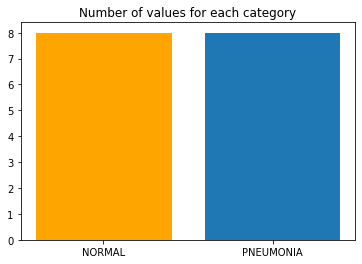

In [6]:
#Number of validation images
print('Validation images:\n')
print('NORMAL:', len(os.listdir(valid_data_dir+'/NORMAL')))
print('PNEUMONIA:', len(os.listdir(valid_data_dir+'/PNEUMONIA')))
print('Total Validation images:', len(os.listdir(valid_data_dir+'/NORMAL')) + len(os.listdir(valid_data_dir+'/PNEUMONIA')))
print('*'*47)
bar_plot(valid_data_dir)


In [7]:
# Get all the data in the directory data/train and reshape them

train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(200, 200), 
        batch_size=5216)

Found 5216 images belonging to 2 classes.


In [8]:
# Get all the data in the directory data/test and reshape them

test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(200, 200), 
        batch_size=624)

Found 624 images belonging to 2 classes.


In [9]:
# Get all the data in the directory data/validation and reshape them

val_generator = ImageDataGenerator().flow_from_directory(
    valid_data_dir, 
    target_size=(200, 200), 
    batch_size=16)

Found 16 images belonging to 2 classes.


In [10]:
#Create our different data sets

#Training set
X_train, y_train = next(train_generator)

#Test set
X_test, y_test = next(test_generator)

#Validation set
X_val, y_val = next(val_generator)

In [11]:
#Let's look at the shape of our data

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(5216, 200, 200, 3)
(5216, 2)
(624, 200, 200, 3)
(624, 2)
(16, 200, 200, 3)
(16, 2)


In [12]:
#let's normalize our data
X_train = X_train / 255
X_test = X_test / 255

#### Let's see a normal x-ray and a pneumonia x-ray ####

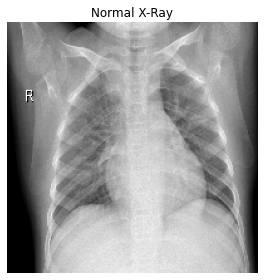

In [13]:
plt.imshow((X_train[0]))
plt.axis('off')
plt.title('Normal X-Ray')
plt.tight_layout()
plt.show()

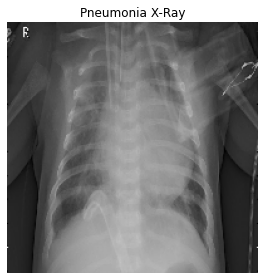

In [14]:
plt.imshow((X_train[1]))
plt.axis('off')
plt.title('Pneumonia X-Ray')
plt.tight_layout()
plt.show()

### Let's reshape our data ###

In [15]:
#Reshaping our X_train data
X_train_unrow = X_train.reshape(5216, -1)
X_train_unrow.shape

(5216, 120000)

In [16]:
#Reshaping our X_test data
X_test_unrow = X_test.reshape(624, -1)
X_test_unrow.shape

(624, 120000)

In [17]:
#Taking a look at our y_train data
y_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [18]:
#Let's take a look at which index represents what class
train_generator.class_indices

{'normal': 0, 'pneumonia': 1}

In [19]:
#Transpose our data
y_train_final = y_train.T[[1]]
y_train_final.shape

(1, 5216)

In [20]:
y_train_final = y_train_final.reshape(5216, 1)
y_train_final.shape

(5216, 1)

In [21]:
y_train_final

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [22]:
#Let's reshape our y_test data
y_test_final = y_test.T[[1]]
y_test_final = y_test_final.reshape(624, 1)
y_test_final.shape

(624, 1)

In [23]:
#Reshaping our X_val and y_val data
X_val_final = X_val.reshape(16, -1)
X_val_final.shape

(16, 120000)

In [24]:
y_val_final = y_val.T[[1]]
y_val_final = y_val_final.reshape(16,1)
y_val_final.shape

(16, 1)

In [25]:
#Lastly let's normalize our data
X_train_final = X_train_unrow
X_test_final = X_test_unrow

In [26]:
print(X_train_final.shape)
print(y_train_final.shape)
print(X_test_final.shape)
print(y_test_final.shape)
print(X_val_final.shape)
print(y_val_final.shape)

(5216, 120000)
(5216, 1)
(624, 120000)
(624, 1)
(16, 120000)
(16, 1)


### Building Our Initial Model ###

In [27]:
model_1 = Sequential()
model_1.add(Dense(50, activation = 'relu', input_shape = (120000,)))
model_1.add(Dense(1, activation = 'sigmoid'))

In [28]:
model_1.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['acc'])

In [29]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                6000050   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 6,000,101
Trainable params: 6,000,101
Non-trainable params: 0
_________________________________________________________________


In [30]:
results_1 = model_1.fit(X_train_final, y_train_final, epochs = 5, batch_size = 50 , validation_data= (X_val_final, y_val_final))

Epoch 1/5
105/105 [==============================] - 4s 40ms/step - loss: 0.5977 - acc: 0.7441 - val_loss: 0.5764 - val_acc: 0.6875
Epoch 2/5
105/105 [==============================] - 4s 35ms/step - loss: 0.3790 - acc: 0.8370 - val_loss: 99.8858 - val_acc: 0.6875
Epoch 3/5
105/105 [==============================] - 4s 33ms/step - loss: 0.3341 - acc: 0.8744 - val_loss: 401.5495 - val_acc: 0.5000
Epoch 4/5
105/105 [==============================] - 4s 34ms/step - loss: 0.3214 - acc: 0.8733 - val_loss: 326.7719 - val_acc: 0.5625
Epoch 5/5
105/105 [==============================] - 3s 33ms/step - loss: 0.2602 - acc: 0.9028 - val_loss: 136.7580 - val_acc: 0.7500


In [31]:
train_loss, train_acc = model_1.evaluate(X_train_final, y_train_final)
print(f'Train Loss: {train_loss}')
print(f'Train Acc: {train_acc}')

163/163 [==============================] - 2s 13ms/step - loss: 0.1767 - acc: 0.9293
Train Loss: 0.17667123675346375
Train Acc: 0.9292561411857605


In [32]:
test_loss, test_acc = model_1.evaluate(X_test_final, y_test_final)
print(f'Test Loss: {test_loss}')
print(f'Test Acc: {test_acc}')

20/20 [==============================] - 0s 10ms/step - loss: 0.7077 - acc: 0.7292
Test Loss: 0.7076523900032043
Test Acc: 0.7291666865348816


#### Loss and Accuracy Curves ####

In [33]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    

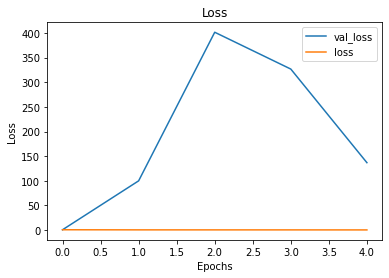

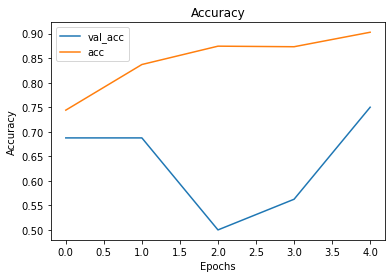

In [34]:
visualize_training_results(results_1)

Looks like our model is overfitting, which is not surprising for an initial model. Let's add some more layers and see how that affects the model.

### Model with More Layers ###

In [35]:
model_2 = Sequential()
model_2.add(Dense(50, activation = 'relu', input_shape = (120000,)))
model_2.add(Dense(35, activation = 'relu'))
model_2.add(Dense(25, activation = 'relu'))
model_2.add(Dense(15, activation = 'relu'))
model_2.add(Dense(1, activation = 'sigmoid'))

In [36]:
model_2.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['acc'])

In [37]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                6000050   
_________________________________________________________________
dense_3 (Dense)              (None, 35)                1785      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                900       
_________________________________________________________________
dense_5 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 16        
Total params: 6,003,141
Trainable params: 6,003,141
Non-trainable params: 0
_________________________________________________________________


In [38]:
results_2 = model_1.fit(X_train_final, y_train_final, epochs = 5, batch_size = 50, validation_data= (X_val_final, y_val_final))

Epoch 1/5
105/105 [==============================] - 4s 33ms/step - loss: 0.2661 - acc: 0.8980 - val_loss: 24.5072 - val_acc: 0.8750
Epoch 2/5
105/105 [==============================] - 4s 38ms/step - loss: 0.2190 - acc: 0.9164 - val_loss: 81.5419 - val_acc: 0.8125
Epoch 3/5
105/105 [==============================] - 4s 43ms/step - loss: 0.1978 - acc: 0.9248 - val_loss: 1405.1138 - val_acc: 0.5000
Epoch 4/5
105/105 [==============================] - 4s 39ms/step - loss: 0.1847 - acc: 0.9354 - val_loss: 90.1098 - val_acc: 0.8125
Epoch 5/5
105/105 [==============================] - 5s 43ms/step - loss: 0.1720 - acc: 0.9394 - val_loss: 105.9429 - val_acc: 0.8125


In [39]:
train_loss, train_acc = model_2.evaluate(X_train_final, y_train_final)
print(f'Test Loss: {train_loss}')
print(f'Test Acc: {train_acc}')

163/163 [==============================] - 2s 15ms/step - loss: 0.6976 - acc: 0.3942
Test Loss: 0.6975898146629333
Test Acc: 0.3941717743873596


In [40]:
test_loss, test_acc = model_2.evaluate(X_test_final, y_test_final)
print(f'Test Loss: {test_loss}')
print(f'Test Acc: {test_acc}')

20/20 [==============================] - 0s 10ms/step - loss: 0.6990 - acc: 0.3462
Test Loss: 0.6990318894386292
Test Acc: 0.3461538553237915


#### Loss and Accuracy Curves ####

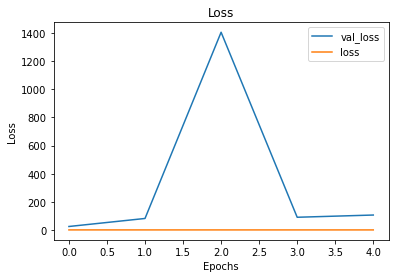

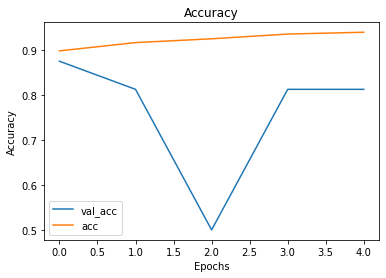

In [41]:
visualize_training_results(results_2)

This time our accuracy fell greatly, so let's add some more epochs to see if that has any improvement on our results.

### Model with more epochs ###

In [42]:
model_3 = Sequential()
model_3.add(Dense(50, activation = 'relu', input_shape = (120000,)))
model_3.add(Dense(35, activation = 'relu'))
model_3.add(Dense(25, activation = 'relu'))
model_3.add(Dense(15, activation = 'relu'))
model_3.add(Dense(1, activation = 'sigmoid'))

In [43]:
model_3.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['acc'])

In [44]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 50)                6000050   
_________________________________________________________________
dense_8 (Dense)              (None, 35)                1785      
_________________________________________________________________
dense_9 (Dense)              (None, 25)                900       
_________________________________________________________________
dense_10 (Dense)             (None, 15)                390       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 16        
Total params: 6,003,141
Trainable params: 6,003,141
Non-trainable params: 0
_________________________________________________________________


In [45]:
results_3 = model_3.fit(X_train_final, y_train_final, epochs = 10, batch_size = 50, validation_data= (X_test_final, y_test_final))

Epoch 1/10
105/105 [==============================] - 4s 42ms/step - loss: 0.6646 - acc: 0.7354 - val_loss: 0.5927 - val_acc: 0.6250
Epoch 2/10
105/105 [==============================] - 4s 38ms/step - loss: 0.4281 - acc: 0.8135 - val_loss: 0.4046 - val_acc: 0.8157
Epoch 3/10
105/105 [==============================] - 4s 37ms/step - loss: 0.3770 - acc: 0.8370 - val_loss: 0.7258 - val_acc: 0.6314
Epoch 4/10
105/105 [==============================] - 4s 34ms/step - loss: 0.2957 - acc: 0.9028 - val_loss: 0.7577 - val_acc: 0.6875
Epoch 5/10
105/105 [==============================] - 4s 39ms/step - loss: 0.2733 - acc: 0.9074 - val_loss: 0.6117 - val_acc: 0.7404
Epoch 6/10
105/105 [==============================] - 4s 36ms/step - loss: 0.2356 - acc: 0.9076 - val_loss: 0.5990 - val_acc: 0.7516
Epoch 7/10
105/105 [==============================] - 3s 33ms/step - loss: 0.2130 - acc: 0.9170 - val_loss: 0.9651 - val_acc: 0.6795
Epoch 8/10
105/105 [==============================] - 3s 33ms/step - 

In [46]:
train_loss, train_acc = model_3.evaluate(X_train_final, y_train_final)
print(f'Train Loss: {train_loss}')
print(f'Train Acc: {train_acc}')

163/163 [==============================] - 2s 12ms/step - loss: 0.1620 - acc: 0.9431
Train Loss: 0.16200865805149078
Train Acc: 0.9430598020553589


In [47]:
test_loss, test_acc = model_3.evaluate(X_test_final, y_test_final)
print(f'Test Loss: {test_loss}')
print(f'Test Acc: {test_acc}')

20/20 [==============================] - 0s 9ms/step - loss: 0.4359 - acc: 0.7933
Test Loss: 0.43591514229774475
Test Acc: 0.7932692170143127


#### Loss and Accuracy Curves ####

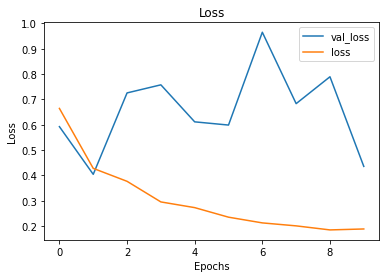

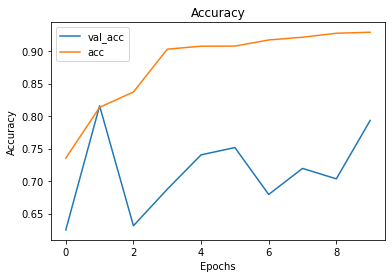

In [48]:
visualize_training_results(results_3)

Slightly better results, but let's add some dropout regularization to see if that helps decrease overfitting.

### Model with Dropout Regularization ###

In [49]:
model_4 = Sequential()
model_4.add(Dense(50, activation = 'relu', input_shape = (120000,)))

model_4.add(layers.Dropout(0.3))
model_4.add(Dense(35, activation = 'relu'))

model_4.add(layers.Dropout(0.3))
model_4.add(Dense(25, activation = 'relu'))

model_4.add(layers.Dropout(0.3))
model_4.add(Dense(15, activation = 'relu'))

model_4.add(layers.Dropout(0.3))
model_4.add(Dense(1, activation = 'sigmoid'))

model_4.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['acc'])

In [50]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 50)                6000050   
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 35)                1785      
_________________________________________________________________
dropout_1 (Dropout)          (None, 35)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 25)                900       
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 15)               

In [51]:
results_4 = model_4.fit(X_train_final, y_train_final, epochs = 10, batch_size = 50, validation_data= (X_test_final, y_test_final))

Epoch 1/10
105/105 [==============================] - 4s 34ms/step - loss: 0.6293 - acc: 0.6887 - val_loss: 0.6705 - val_acc: 0.6250
Epoch 2/10
105/105 [==============================] - 4s 33ms/step - loss: 0.5640 - acc: 0.7418 - val_loss: 0.5631 - val_acc: 0.6250
Epoch 3/10
105/105 [==============================] - 3s 33ms/step - loss: 0.5056 - acc: 0.7412 - val_loss: 0.5347 - val_acc: 0.6250
Epoch 4/10
105/105 [==============================] - 3s 33ms/step - loss: 0.4682 - acc: 0.7419 - val_loss: 0.5987 - val_acc: 0.6250
Epoch 5/10
105/105 [==============================] - 3s 33ms/step - loss: 0.4478 - acc: 0.7416 - val_loss: 0.4937 - val_acc: 0.6250
Epoch 6/10
105/105 [==============================] - 3s 33ms/step - loss: 0.5374 - acc: 0.7421 - val_loss: 0.6601 - val_acc: 0.6250
Epoch 7/10
105/105 [==============================] - 4s 33ms/step - loss: 0.4569 - acc: 0.7419 - val_loss: 0.8076 - val_acc: 0.6250
Epoch 8/10
105/105 [==============================] - 4s 35ms/step - 

In [52]:
train_loss, train_acc = model_4.evaluate(X_train_final, y_train_final)
print(f'Train Loss: {train_loss}')
print(f'Train Acc: {train_acc}')

163/163 [==============================] - 2s 12ms/step - loss: 0.2968 - acc: 0.7429
Train Loss: 0.29682180285453796
Train Acc: 0.7429064512252808


In [53]:
test_loss, test_acc = model_4.evaluate(X_test_final, y_test_final)
print(f'Test Loss: {test_loss}')
print(f'Test Acc: {test_acc}')

20/20 [==============================] - 0s 10ms/step - loss: 0.8079 - acc: 0.6250
Test Loss: 0.8078903555870056
Test Acc: 0.625


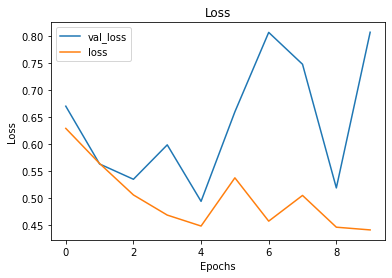

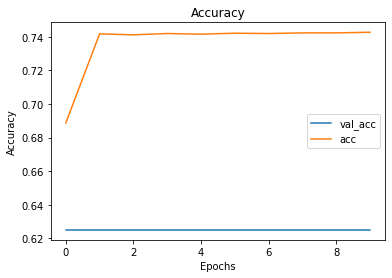

In [54]:
visualize_training_results(results_4)

That doesn't seem to have helped, and if anything has made it worse. Let's try a different approach and try using a CNN.

### Let's Build a CNN ###

In [55]:
# get all the data in the train directory 
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_data_dir, 
        target_size=(100, 100), 
        batch_size = 5216, 
        class_mode='binary')

# get all the data in the test directory
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_data_dir, 
        target_size=(100, 100), 
        batch_size = 624,
        class_mode='binary') 


# get all the data in the val directory 
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        valid_data_dir, 
        target_size=(100, 100),
        batch_size = 16,
        class_mode='binary')



Found 5216 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [56]:
X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)
X_val, y_val = next(val_generator)

In [57]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100 ,100,  3)))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)             

In [59]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=60,
                    validation_data=(X_val, y_val))

Epoch 1/20
87/87 [==============================] - 34s 386ms/step - loss: 0.5779 - acc: 0.7429 - val_loss: 0.8457 - val_acc: 0.5000
Epoch 2/20
87/87 [==============================] - 34s 390ms/step - loss: 0.5524 - acc: 0.7429 - val_loss: 0.8626 - val_acc: 0.5000
Epoch 3/20
87/87 [==============================] - 34s 396ms/step - loss: 0.4983 - acc: 0.7594 - val_loss: 0.9549 - val_acc: 0.5000
Epoch 4/20
87/87 [==============================] - 33s 381ms/step - loss: 0.4487 - acc: 0.7975 - val_loss: 1.3778 - val_acc: 0.5000
Epoch 5/20
87/87 [==============================] - 33s 381ms/step - loss: 0.3782 - acc: 0.8391 - val_loss: 1.0349 - val_acc: 0.5625
Epoch 6/20
87/87 [==============================] - 33s 382ms/step - loss: 0.3212 - acc: 0.8645 - val_loss: 1.4025 - val_acc: 0.5625
Epoch 7/20
87/87 [==============================] - 33s 379ms/step - loss: 0.2667 - acc: 0.8888 - val_loss: 0.4934 - val_acc: 0.8125
Epoch 8/20
87/87 [==============================] - 33s 380ms/step - 

In [60]:
train_loss, train_acc = model.evaluate(X_train, y_train)
print(f'Train Loss: {train_loss}')
print(f'Train Acc: {train_acc}')

163/163 [==============================] - 7s 40ms/step - loss: 0.1281 - acc: 0.9521
Train Loss: 0.12808310985565186
Train Acc: 0.9520705342292786


In [61]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Acc: {test_acc}')

20/20 [==============================] - 1s 36ms/step - loss: 0.1307 - acc: 0.9471
Test Loss: 0.13074487447738647
Test Acc: 0.9471153616905212


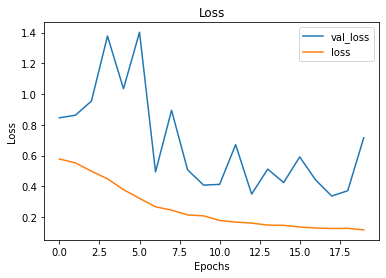

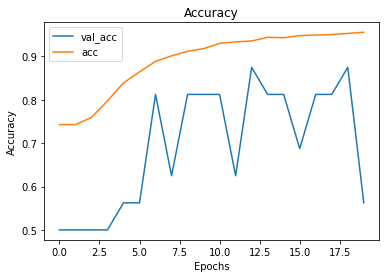

In [62]:
visualize_training_results(history)

Our initial model is overfitting, so let's try adding some dropout regularization. 

#### Let's add dropout regularization ####

In [63]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100 ,100,  3)))

model2.add(layers.MaxPooling2D((2, 2)))


model2.add(Dropout(0.4))
model2.add(layers.Conv2D(32, (4, 4), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(Dropout(0.4))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))


model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [64]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 46, 46, 32)        16416     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 64)       

In [65]:
history = model2.fit(X_train, y_train,
                    epochs=20,
                    batch_size=60,
                    validation_data=(X_val, y_val))

Epoch 1/20
87/87 [==============================] - 38s 434ms/step - loss: 0.5494 - acc: 0.7437 - val_loss: 0.6799 - val_acc: 0.5625
Epoch 2/20
87/87 [==============================] - 38s 435ms/step - loss: 0.4899 - acc: 0.7786 - val_loss: 0.7381 - val_acc: 0.5000
Epoch 3/20
87/87 [==============================] - 38s 432ms/step - loss: 0.4168 - acc: 0.8108 - val_loss: 0.7285 - val_acc: 0.5625
Epoch 4/20
87/87 [==============================] - 38s 435ms/step - loss: 0.3516 - acc: 0.8480 - val_loss: 0.7813 - val_acc: 0.5625
Epoch 5/20
87/87 [==============================] - 38s 435ms/step - loss: 0.2951 - acc: 0.8715 - val_loss: 0.8894 - val_acc: 0.5625
Epoch 6/20
87/87 [==============================] - 38s 437ms/step - loss: 0.2657 - acc: 0.8900 - val_loss: 0.7302 - val_acc: 0.6250
Epoch 7/20
87/87 [==============================] - 38s 433ms/step - loss: 0.2347 - acc: 0.9024 - val_loss: 0.5060 - val_acc: 0.8125
Epoch 8/20
87/87 [==============================] - 38s 434ms/step - 

In [66]:
train_loss, train_acc = model2.evaluate(X_train, y_train)
print(f'Train Loss: {train_loss}')
print(f'Train Acc: {train_acc}')

163/163 [==============================] - 7s 40ms/step - loss: 0.1722 - acc: 0.9471
Train Loss: 0.172173410654068
Train Acc: 0.9470859169960022


In [67]:
test_loss, test_acc = model2.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Acc: {test_acc}')

20/20 [==============================] - 1s 38ms/step - loss: 0.1742 - acc: 0.9471
Test Loss: 0.17423951625823975
Test Acc: 0.9471153616905212


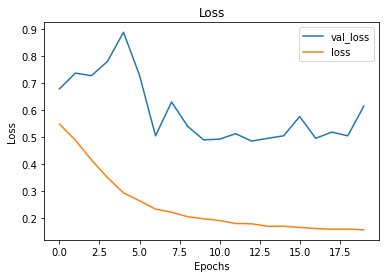

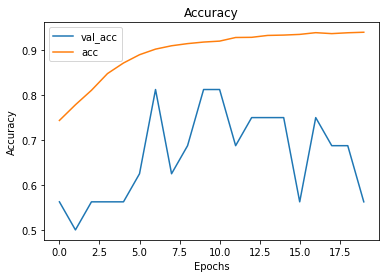

In [68]:
visualize_training_results(history)

Slightly more promising results, so let's see what happens if we decrease the number of epochs to around 10

#### Let's decrease the number of epochs to 10 ####

In [69]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100 ,100,  3)))

model3.add(layers.MaxPooling2D((2, 2)))


model3.add(Dropout(0.4))
model3.add(layers.Conv2D(32, (4, 4), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(Dropout(0.4))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))


model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [70]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 46, 32)        16416     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 21, 64)       

In [71]:
history = model3.fit(X_train, y_train,
                    epochs=10,
                    batch_size=60,
                    validation_data=(X_val, y_val))

Epoch 1/10
87/87 [==============================] - 38s 439ms/step - loss: 0.5602 - acc: 0.7395 - val_loss: 0.6879 - val_acc: 0.5000
Epoch 2/10
87/87 [==============================] - 38s 441ms/step - loss: 0.4970 - acc: 0.7780 - val_loss: 0.7126 - val_acc: 0.5000
Epoch 3/10
87/87 [==============================] - 38s 437ms/step - loss: 0.4356 - acc: 0.8023 - val_loss: 0.6511 - val_acc: 0.6250
Epoch 4/10
87/87 [==============================] - 38s 437ms/step - loss: 0.3548 - acc: 0.8489 - val_loss: 0.7728 - val_acc: 0.5625
Epoch 5/10
87/87 [==============================] - 38s 438ms/step - loss: 0.3022 - acc: 0.8704 - val_loss: 0.8208 - val_acc: 0.5625
Epoch 6/10
87/87 [==============================] - 38s 437ms/step - loss: 0.2779 - acc: 0.8884 - val_loss: 0.6181 - val_acc: 0.6250
Epoch 7/10
87/87 [==============================] - 38s 438ms/step - loss: 0.2351 - acc: 0.9011 - val_loss: 0.5207 - val_acc: 0.7500
Epoch 8/10
87/87 [==============================] - 38s 439ms/step - 

In [72]:
train_loss, train_acc = model3.evaluate(X_train, y_train)
print(f'Train Loss: {train_loss}')
print(f'Train Acc: {train_acc}')

163/163 [==============================] - 7s 41ms/step - loss: 0.3072 - acc: 0.9013
Train Loss: 0.3071979582309723
Train Acc: 0.9012653231620789


In [73]:
test_loss, test_acc = model3.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Acc: {test_acc}')

20/20 [==============================] - 1s 37ms/step - loss: 0.3072 - acc: 0.9119
Test Loss: 0.3072218894958496
Test Acc: 0.9118589758872986


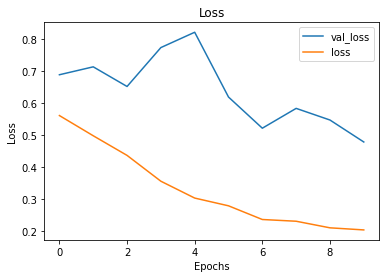

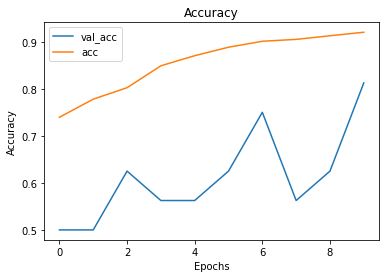

In [74]:
visualize_training_results(history)

## Conclusion ##

Our goal was to work with Palomar Medical Center to build an image classification model that takes patient X-rays and identifies if the patient has Pneumonia or not. This will help the hospital doctors make a quicker diagnosis, and reduce the time spent on consulting X-rays before meeting with patients. We initially used a deep neural network, then moved onto a Convolutional Neural 
Network. 

Our initial deep neural network had 0 hidden layers, and after running we found it was overfitting. Our model had a testing accuracy of about 92% and a testing accuracy of 72%. For the next model, we added more layers, and after running it found that while accuracy dramatically dropped, it was still overfitting. It had a training accuracy of about 39% and a testing accuracy of about 34%. Next, we added more epochs to see if that would have an impact on our accuracy and overfitting issue. We found that we still had an overfitting issue, but our accuracy improved again, with our training accuracy at about 94%, and our testing accuracy at 79%. Lastly, we implemented dropout regularization, to see if that would reduce overfitting. Our training accuracy was 74%, while our testing accuracy was about 62%, so overfitting was still an issue. We then decided to switch over to a CNN.

Our initial CNN model had 2 convolutional layers, 3 pooling layers, 1 flattening layer and 1 fully connected dense layer. Our initial training accuracy was about 95% and our testing accuracy was about 94%. This along with our loss and accuracy curves sugested overfitting still. Next we implemented dropout regularization before doing anything else to see if our overfitting would be addressed. Our curves improved slightly, and our testing and training accuracy were both at about 94%. Lastly, we decreased the number of epochs from 20 to 10. Here, we saw the most improvement, not only in our curves but also in our accuracy. Our final training accuracy was about 90%, and our final testing accuracy was about 91%. 

Our model accuracy overall improved greatly when switching from a deep neural network to a CNN. At it's lowest, our deep neural network had a testing accuracy of about 34%, and at its highest it was about 79%. In comparison, our CNN had at its lowest a testing accuracy of about 91%, and at its highest 94%. Our model is still overfitting, but compared to previous models, we were able to reduce it somewhat through Dropout Regularization and reducing the number of epochs. 